testdata selected
46675 packets


Enter your institution's domain name:  gu.se


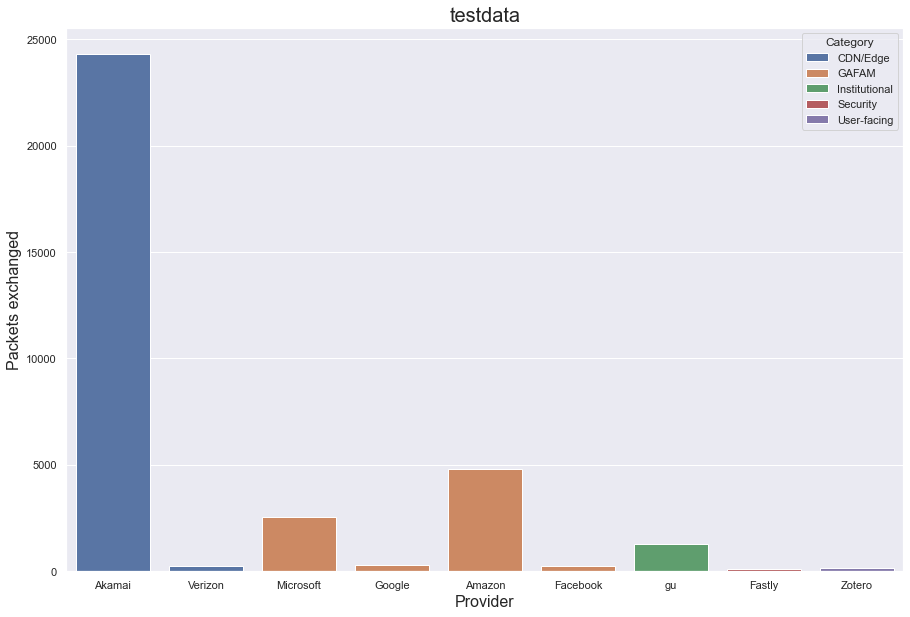

Unknown domain names:
['       ', '    global stargate cse ssinf net', 'global stargate cse ssinf net    ', '    trello com', 'trello com    ', 'bfcc abad', 'abad bfcc', 'bfcc amssinxe e net', 'amssinxe e net bfcc', 'bfcc amssinx e net', 'amssinx e net bfcc', '    t kite com', 't kite com    ', 'bfcc images singletracks com', 'images singletracks com bfcc', '    frankthewelder com', 'frankthewelder com    ', '    expert antagning se', 'expert antagning se    ', '    cs wpc vcdn net', 'cs wpc vcdn net    ']


In [2]:
# Process and categorize data from Wireshark
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':(15, 10), 'font.size':8,'axes.titlesize':8,'axes.labelsize':16})
import tkinter as tk
from tkinter import filedialog
import re
import warnings

warnings.filterwarnings("ignore")
sep = '.'

# Specify a CSV file exported from Wireshark
root = tk.Tk()
root.withdraw()
path = filedialog.askopenfilename(title = 'Select a Wireshark CSV file')
with open(path, encoding="utf8", errors='ignore') as file:
    raw = pd.read_csv(file, index_col=[0], dtype=object)
raw = raw.loc[raw['Protocol'] == 'TCP']
raw['Domain'] = raw['Source'] +" "+ raw['Destination']
raw['Domain'] = raw['Domain'].str.lower().str.split('.')
filename = path.split('/')[-1].split('.')[0]
print(filename+' selected')
count_row = raw.shape[0]
print(str(count_row)+' packets')

# Specify own institutional domain name
own = input("Enter your institution's domain name: ")
own = own.split(sep, 1)[0]

# Categorization schema
schema = pd.read_csv('providers.csv')
new_row = {'Name': own, 'Category': 'Institutional', 'Domain': own}
schema = schema.append(new_row, ignore_index=True)

# Categorize the data
cat = raw.copy()
cat['Domain'] = cat['Domain'].apply(lambda x: [item for item in x if item in schema['Domain'].tolist()])
cat['Domain'] = cat['Domain'].astype(str)
cat['Domain'] = cat['Domain'].str.replace('[^\w\s]','')
cat = cat.merge(schema, how='left', on='Domain')
cat.drop(['Time', 'Source', 'Destination', 'Length', 'Info', 'Protocol'], axis=1, inplace=True)
cat = cat.sort_values(by ='Category' )

# Visualize the results of the categorization
ax = sns.countplot(x='Name', hue='Category', dodge=False, data=cat)
ax.set(xlabel='Provider', ylabel='Packets exchanged')
ax.set_title(filename, fontsize=20)
plt.show()

# List the unknown domain names leftover
print('Unknown domain names:')
raw['Domain'] = raw['Domain'].astype(str)
raw['Domain'] = raw['Domain'].str.replace('[^\w\s]','')
raw['Domain'] = raw['Domain'].str.replace('[0-9]','')
uni = raw.Domain.unique()
known = re.compile('|'.join([re.escape(word) for word in schema.Domain]))
unknown = [word for word in uni if not known.search(word)]
print(unknown)

In [ ]:
# Save files
fig = ax.get_figure()
fig.savefig(filename+'.png', dpi=720)

with open(filename+'_unknowns.txt', mode='wt', encoding='utf-8') as out:
    out.write('\n'.join(unknown))